# Bowtie 2

## Imports

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16
# %matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Loading data

In [2]:
data = pd.read_csv("../data/bow-tie.csv")

In [3]:
data.head()

,Unnamed: 0,x1,x2,t,x3
0,0,-20.00000,-22.837923,0.0,456.758456
1,1,-19.95996,-30.545483,0.0,609.686611
2,2,-19.91992,-23.318671,0.0,464.506069
3,3,-19.87988,-22.799704,0.0,453.255376
4,4,-19.83984,-31.876668,0.0,632.427995


In [4]:
data.drop(["Unnamed: 0", "x3"], axis=1, inplace=True)

In [5]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
x1,2000.0,-1.207923e-16,11.561449,-20.000000,-10.000000,0.000000,10.000000,20.000000
x2,2000.0,-3.858392e-01,20.587391,-51.902993,-15.819489,0.458157,16.014055,49.869455
t,2000.0,5.000000e-01,0.500125,0.000000,0.000000,0.500000,1.000000,1.000000


In [6]:
data.describe()

,x1,x2,t
count,2.000000e+03,2000.000000,2000.000000
mean,-1.207923e-16,-0.385839,0.500000
std,1.156145e+01,20.587391,0.500125
min,-2.000000e+01,-51.902993,0.000000
25%,-1.000000e+01,-15.819489,0.000000
50%,0.000000e+00,0.458157,0.500000
75%,1.000000e+01,16.014055,1.000000
max,2.000000e+01,49.869455,1.000000


In [7]:
data.sample(10)

,x1,x2,t
27,-18.918919,-29.346560,0.0
1051,-17.957958,49.869455,1.0
812,12.512513,15.093013,0.0
1386,-4.544545,8.986790,1.0
781,11.271271,23.664798,0.0
433,-2.662663,-0.859191,0.0
1627,5.105105,-8.250571,1.0
143,-14.274274,-31.318820,0.0
1806,12.272272,-20.883986,1.0
285,-8.588589,-13.303090,0.0


## Exploratory Data Analysis

In [8]:
x1 = data['x1']
x2 = data['x2']
t = data['t']

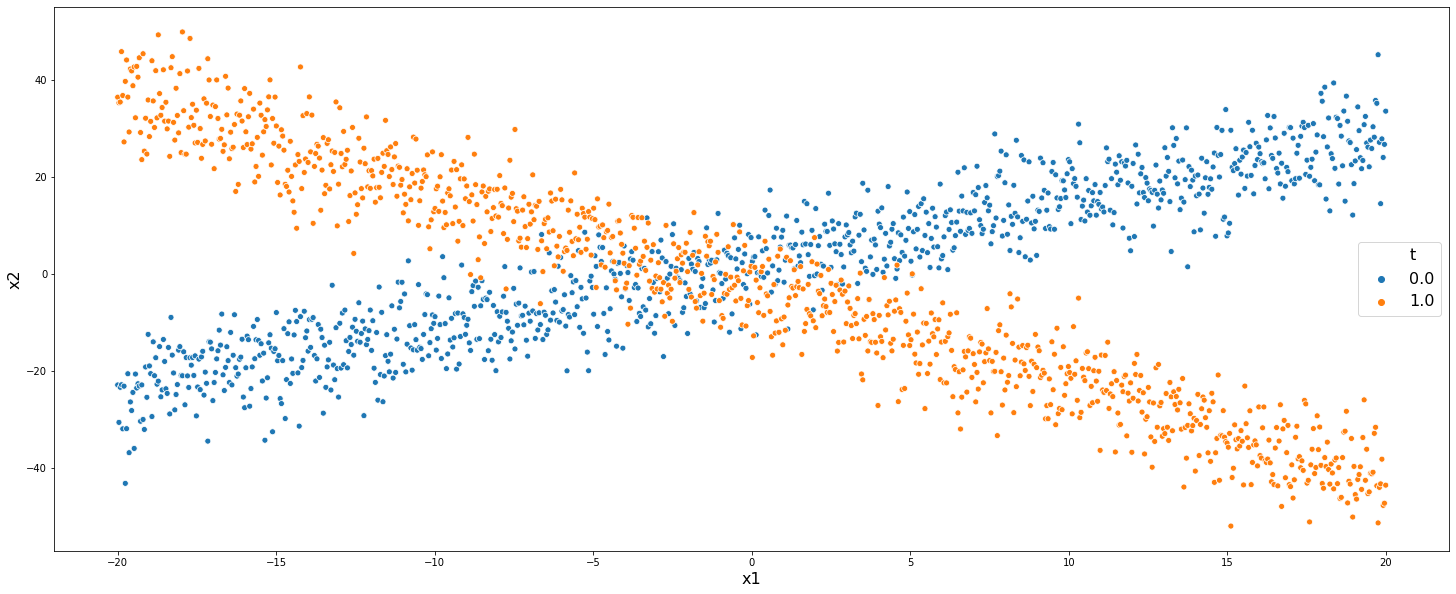

In [11]:
sns.scatterplot(x1, x2, hue=t);

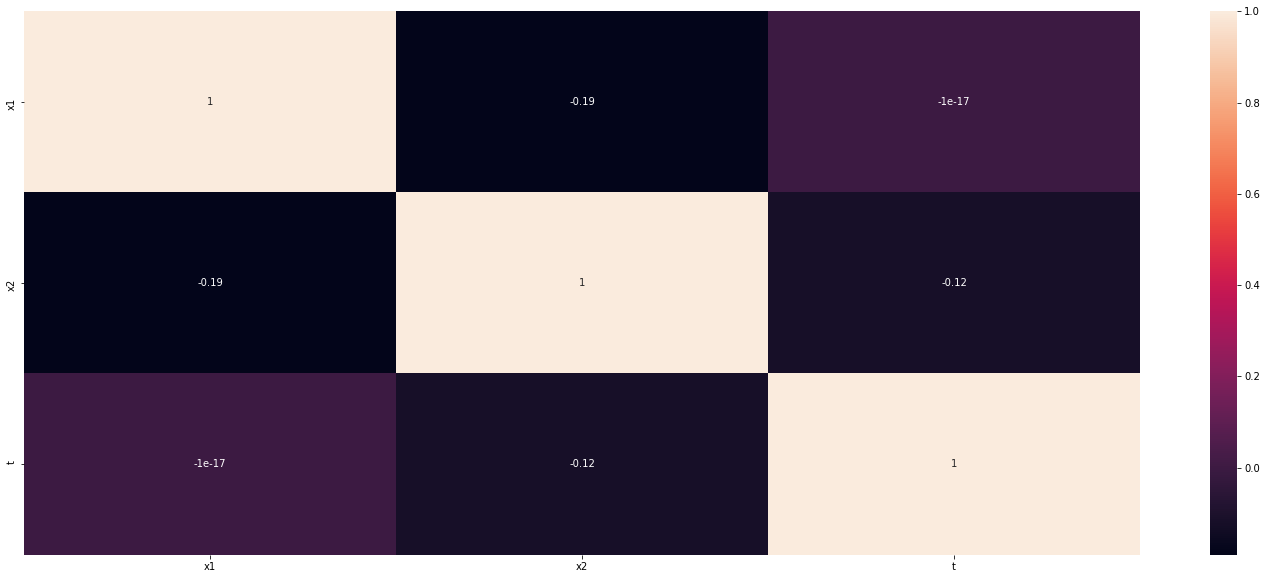

In [12]:
sns.heatmap(data.corr(), annot=True);

In [13]:
plt.hist(data['x3'], alpha=0.5)

KeyError: 'x3'

/Users/stiwari/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/Users/stiwari/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/stiwari/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/stiwari/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/Users/stiwari/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]


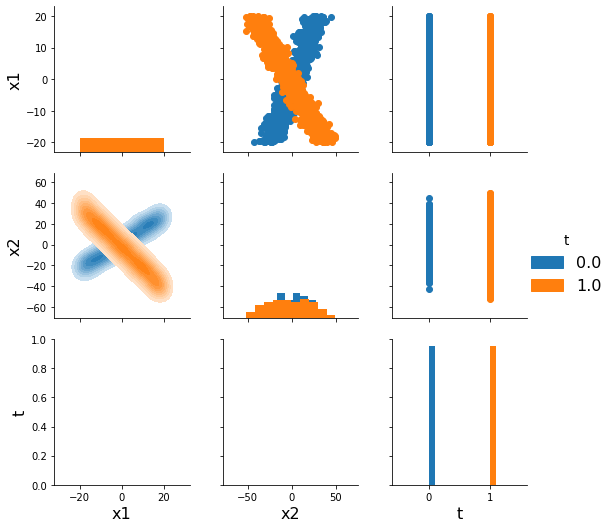

In [14]:
g = sns.PairGrid(data, hue='t')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, shade = True, shade_lowest = False)
g = g.map_diag(plt.hist)
g = g.add_legend()

When $t=0$, we see that $x1$ and $x2$ have a positive correlation. And when $t=1$, we see that $x1$ and $x2$ have a negative correlation.

In [15]:
data['x3'] = (data['x1']*data['x2'])

We have created an interactive variable that is a function of both $x1$ and $x2$

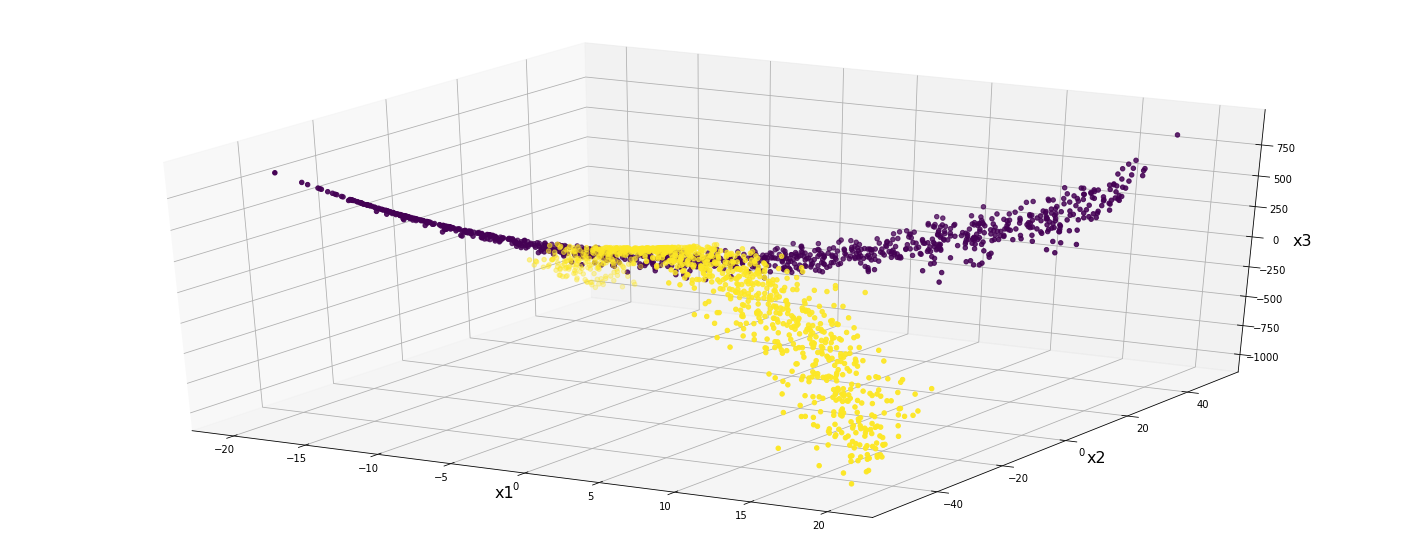

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x1'], data['x2'], data['x3'], c=t);
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('x3');
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

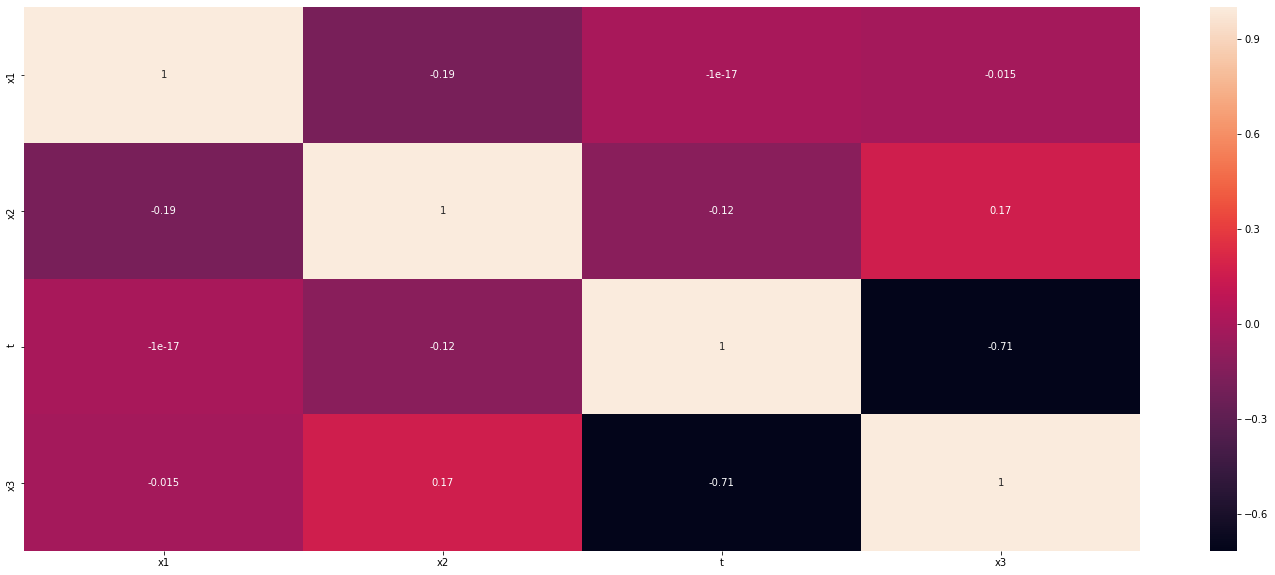

In [17]:
sns.heatmap(data.corr(), annot=True)

## Classification Models

### Logistic Regression

#### Using only x3 a predictor for t

In [18]:
X = data[['x3']]

X_train, X_test, y_train, y_test = train_test_split(X, t, random_state=42)

In [19]:
clf = LogisticRegression(solver='lbfgs')

clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
clf.score(X_test, y_test)

0.9

#### Using only x2 to predict

In [21]:
X = data[['x2']]

X_train, X_test, y_train, y_test = train_test_split(X, t, random_state=42)

In [22]:
clf = LogisticRegression(solver='lbfgs')

clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
clf.score(X_test, y_test)

0.556

#### Using only x1 to predict

In [24]:
X = data[['x1']]

X_train, X_test, y_train, y_test = train_test_split(X, t, random_state=42)

In [25]:
clf = LogisticRegression(solver='lbfgs')

clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
clf.score(X_test, y_test)

0.47

#### Using x2 and x3 to predict

In [27]:
X = data[['x1', 'x2', 'x3']]

X_train, X_test, y_train, y_test = train_test_split(X, t, random_state=42)

In [28]:
clf = LogisticRegression(solver='lbfgs')

clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# predictions = clf.predict(X1_test)

clf.score(X_test, y_test)

0.912

We see that $x3$ is the most important predictor for classifying each data point, producing an accuracy of 90% by itself. We can use only $x3$ for future models

In [30]:
X = X[['x3']]

### K-Nearest Neighbors

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, t, random_state=42)

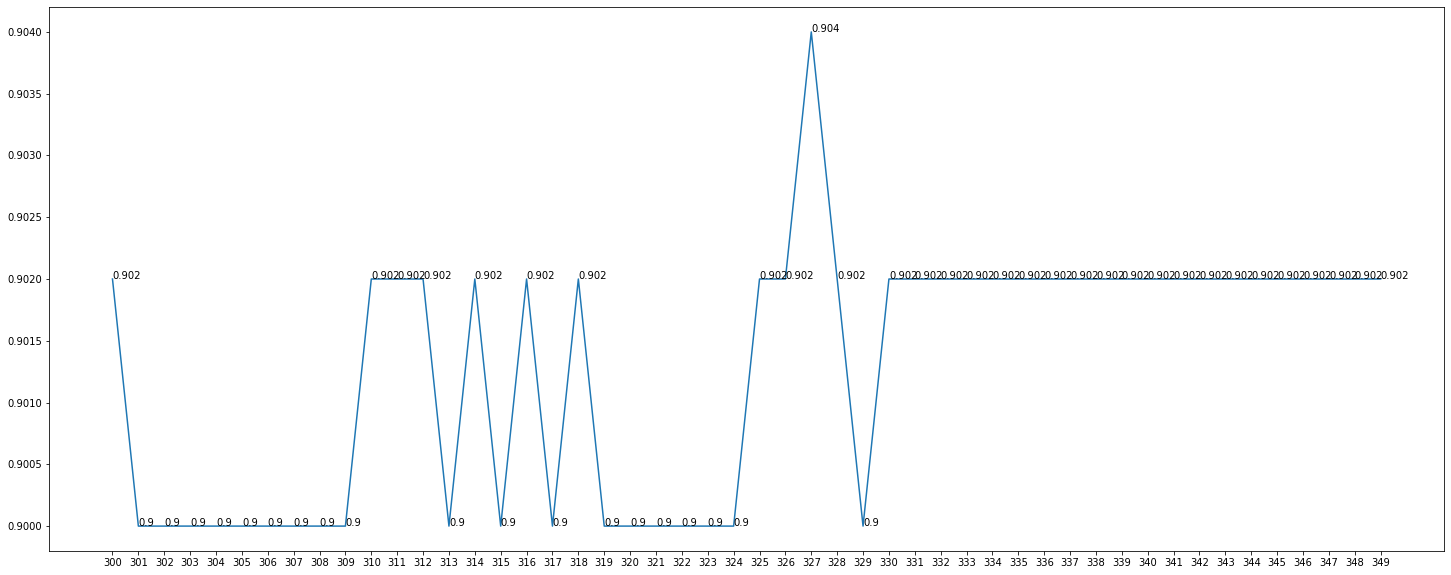

In [32]:
n_neighbors = range(300, 350)
scores = []

for n in n_neighbors:
    clf = KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

fig, ax = plt.subplots()
ax.plot(n_neighbors, scores);
plt.xticks(ticks=n_neighbors, labels=n_neighbors);
for i in range(len(scores)):
    ax.annotate(scores[i], (n_neighbors[i], scores[i]))

In [33]:
clf = KNeighborsClassifier(327)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.904

We see that choosing 327 neighbors produces the highest accuracy for this dataset, accurately predicting the labels 90.4% of the time 

### Support Vector Machines

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, t, random_state=42)

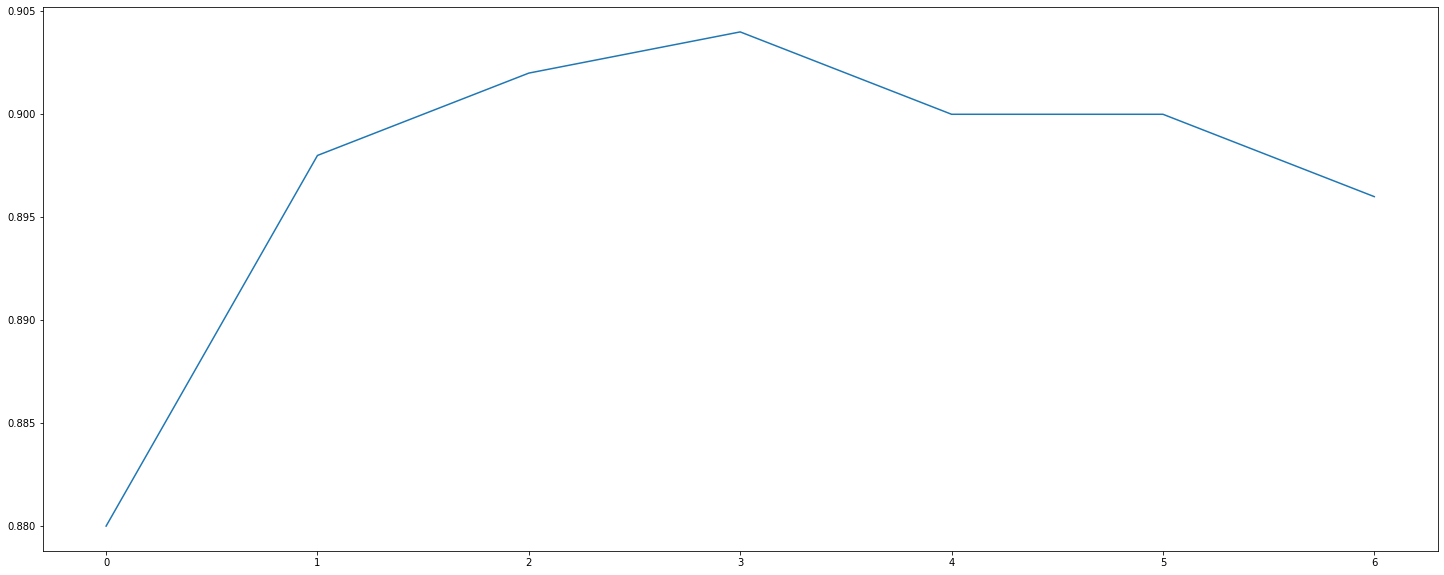

In [35]:
svm_scores = []

for i in range(7):
    svm = SVC(C = 1.0, gamma=10**-i)
    svm.fit(X_train, y_train)
    svm_score = svm.score(X_test, y_test)
    svm_scores.append(svm_score)

plt.plot(np.arange(7), svm_scores);

In [36]:
svm = SVC(C = 1.0, gamma=10**-3)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.904

### Normalizing the data

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_standard_scaled = pd.DataFrame(scaler.fit_transform(X), columns = data.columns.values.tolist()[2:3])

X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled, t, random_state=42)

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier()

In [40]:
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.902